In [1]:
import sys 
sys.path.append('..')

In [2]:
import pandas as pd
from os import listdir
from os.path import isfile, join
from climate.trend_plots import plot_measurements_by_measure, plot_measurements

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
path = '../input/climate/real+grid'
files = [f.split('.')[0] for f in listdir(path) if isfile(join(path, f))]

data = dict()
for f in files:
    data[f] = pd.read_csv(f'{path}/{f}.csv')

In [5]:
plot_measurements(data['VPD_Chokurdakh'], 'Chokurdakh', 'Vapour pressure deficit (mbar)', [1901, 1980], [1979, 2020])
plot_measurements(data['Temp_Chokurdakh'], 'Chokurdakh', 'Temperature (°C)', [1901, 1980], [1979, 2020])
plot_measurements(data['Prec_Chokurdakh'], 'Chokurdakh', 'Precipitation (mm)', [1901, 1980], [1979, 2020])

plot_measurements(data['VPD_Khatanga'], 'Khatanga', 'Vapour pressure deficit (mbar)', [1901, 1980], [1979, 2020])
plot_measurements(data['Temp_Khatanga'], 'Khatanga', 'Temperature (°C)', [1901, 1980], [1979, 2020])
plot_measurements(data['Prec_Khatanga'], 'Khatanga', 'Precipitation (mm)', [1901, 1980], [1979, 2020])

plot_measurements(data['Prec_Inuvik'], 'Inuvik', 'Precipitation (mm)', [1901, 1980], [1979, 2020])
plot_measurements(data['VPD_Inuvik'], 'Inuvik', 'Vapour pressure deficit (mbar)', [1901, 1980], [1979, 2020])
plot_measurements(data['Temp_Inuvik'], 'Inuvik', 'Temperature (°C)', [1901, 1980], [1979, 2020])

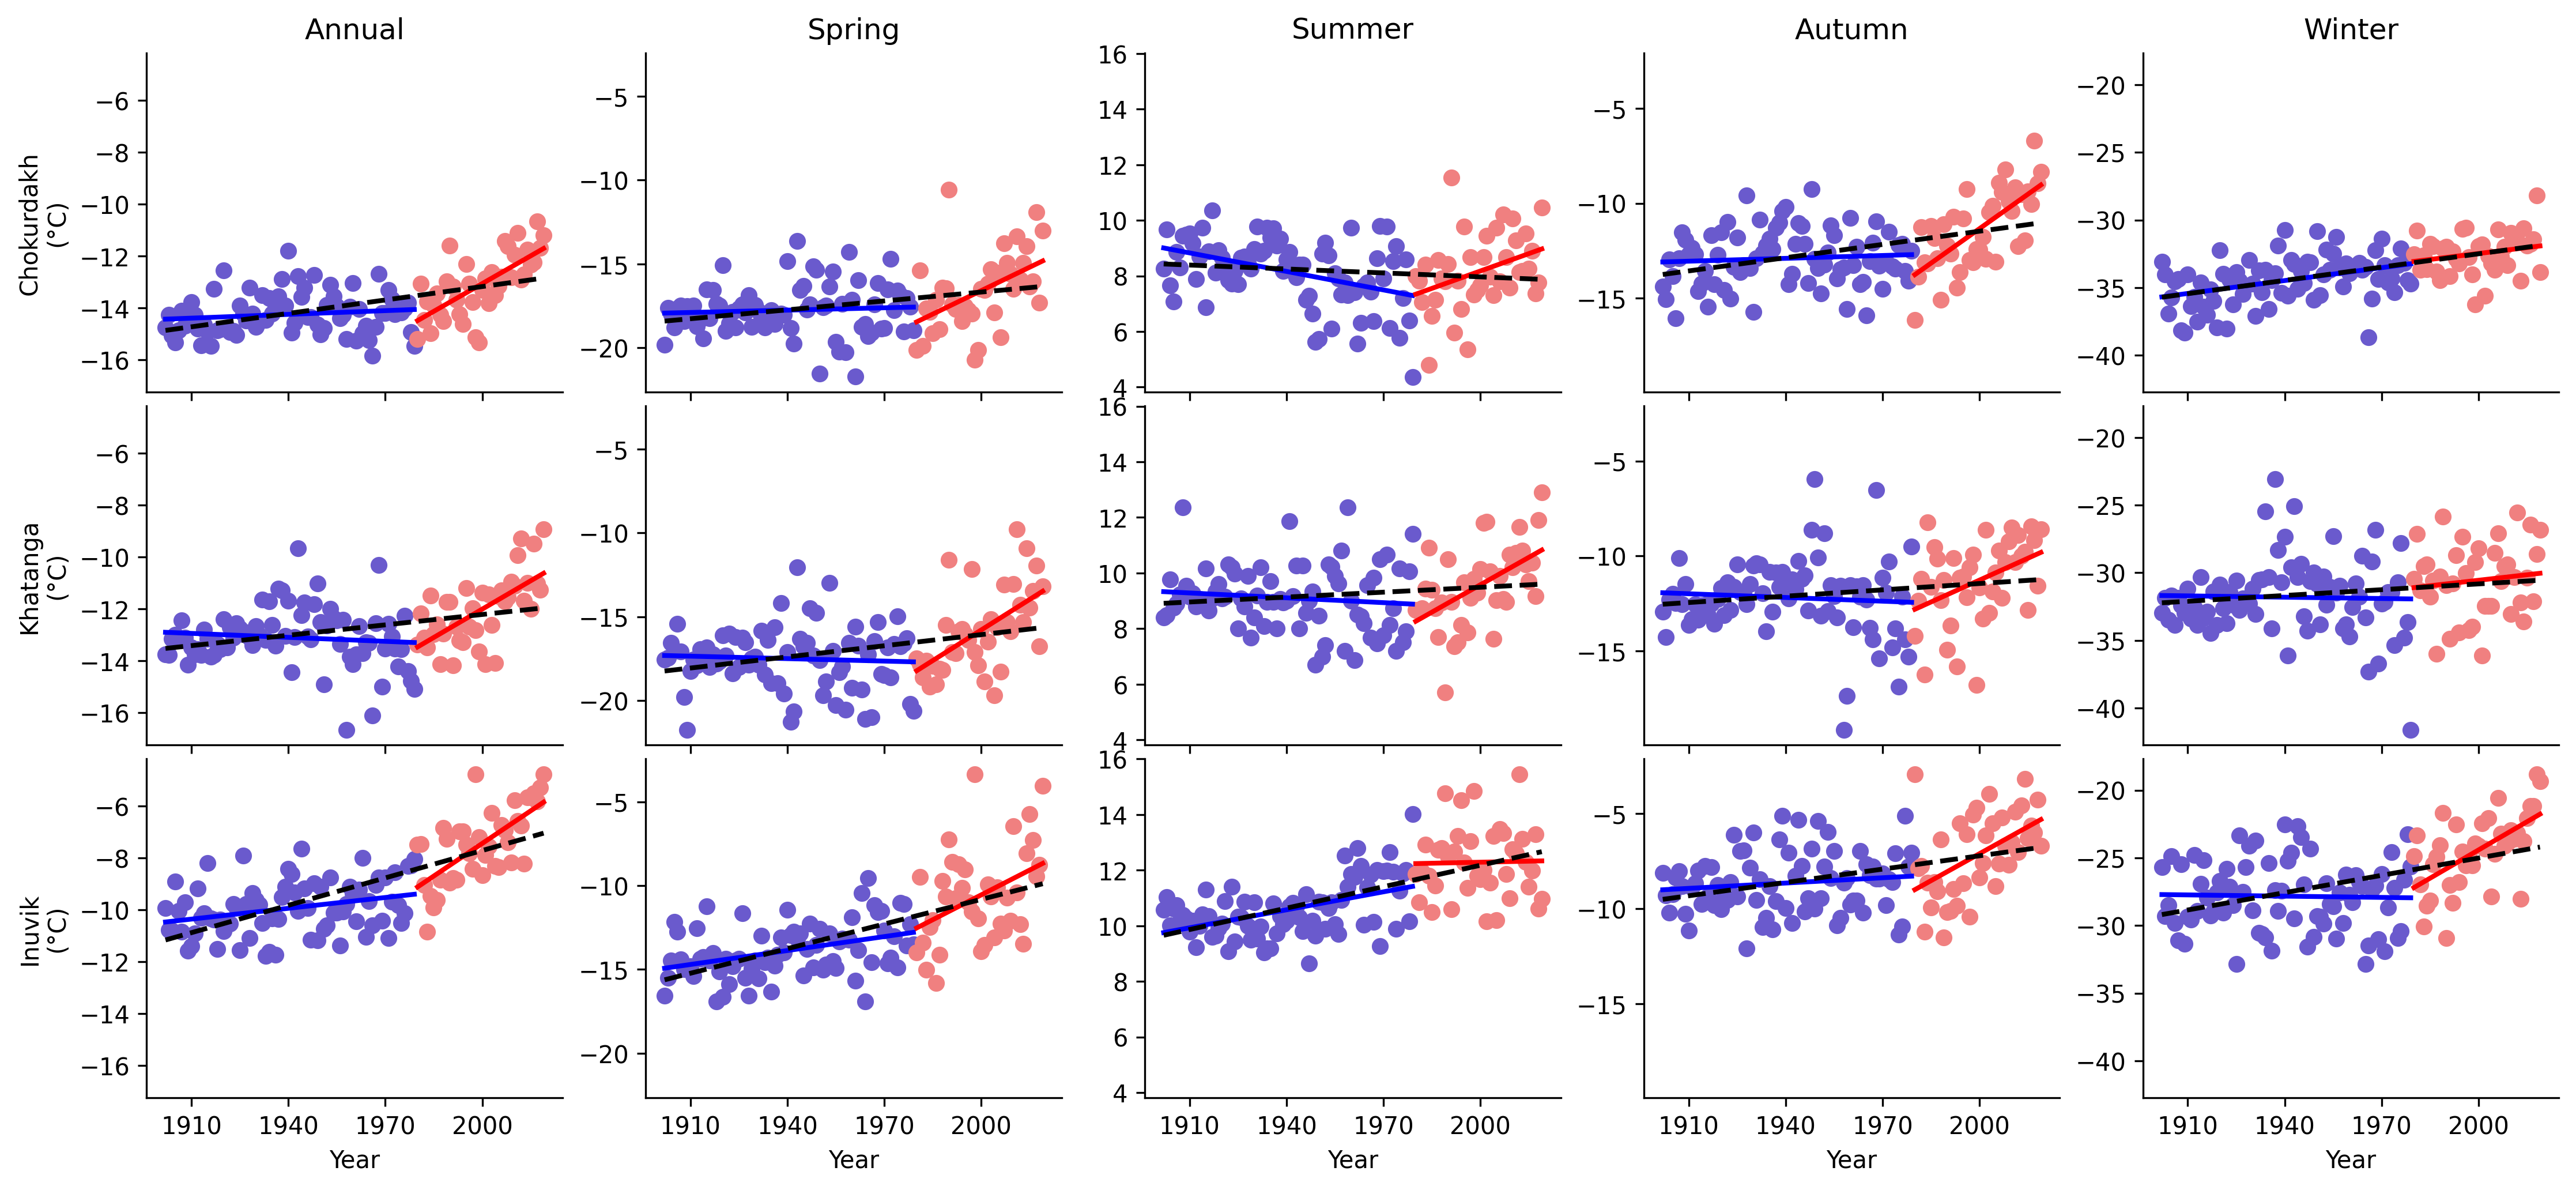

In [25]:
plot_measurements_by_measure([data['Temp_Chokurdakh'], data['Temp_Khatanga'], data['Temp_Inuvik']], ['Chokurdakh', 'Khatanga', 'Inuvik'], 'Temperature', '(°C)', [1901, 1980], [1979, 2020], xticks=range(1910, 2020, 30), save=False)

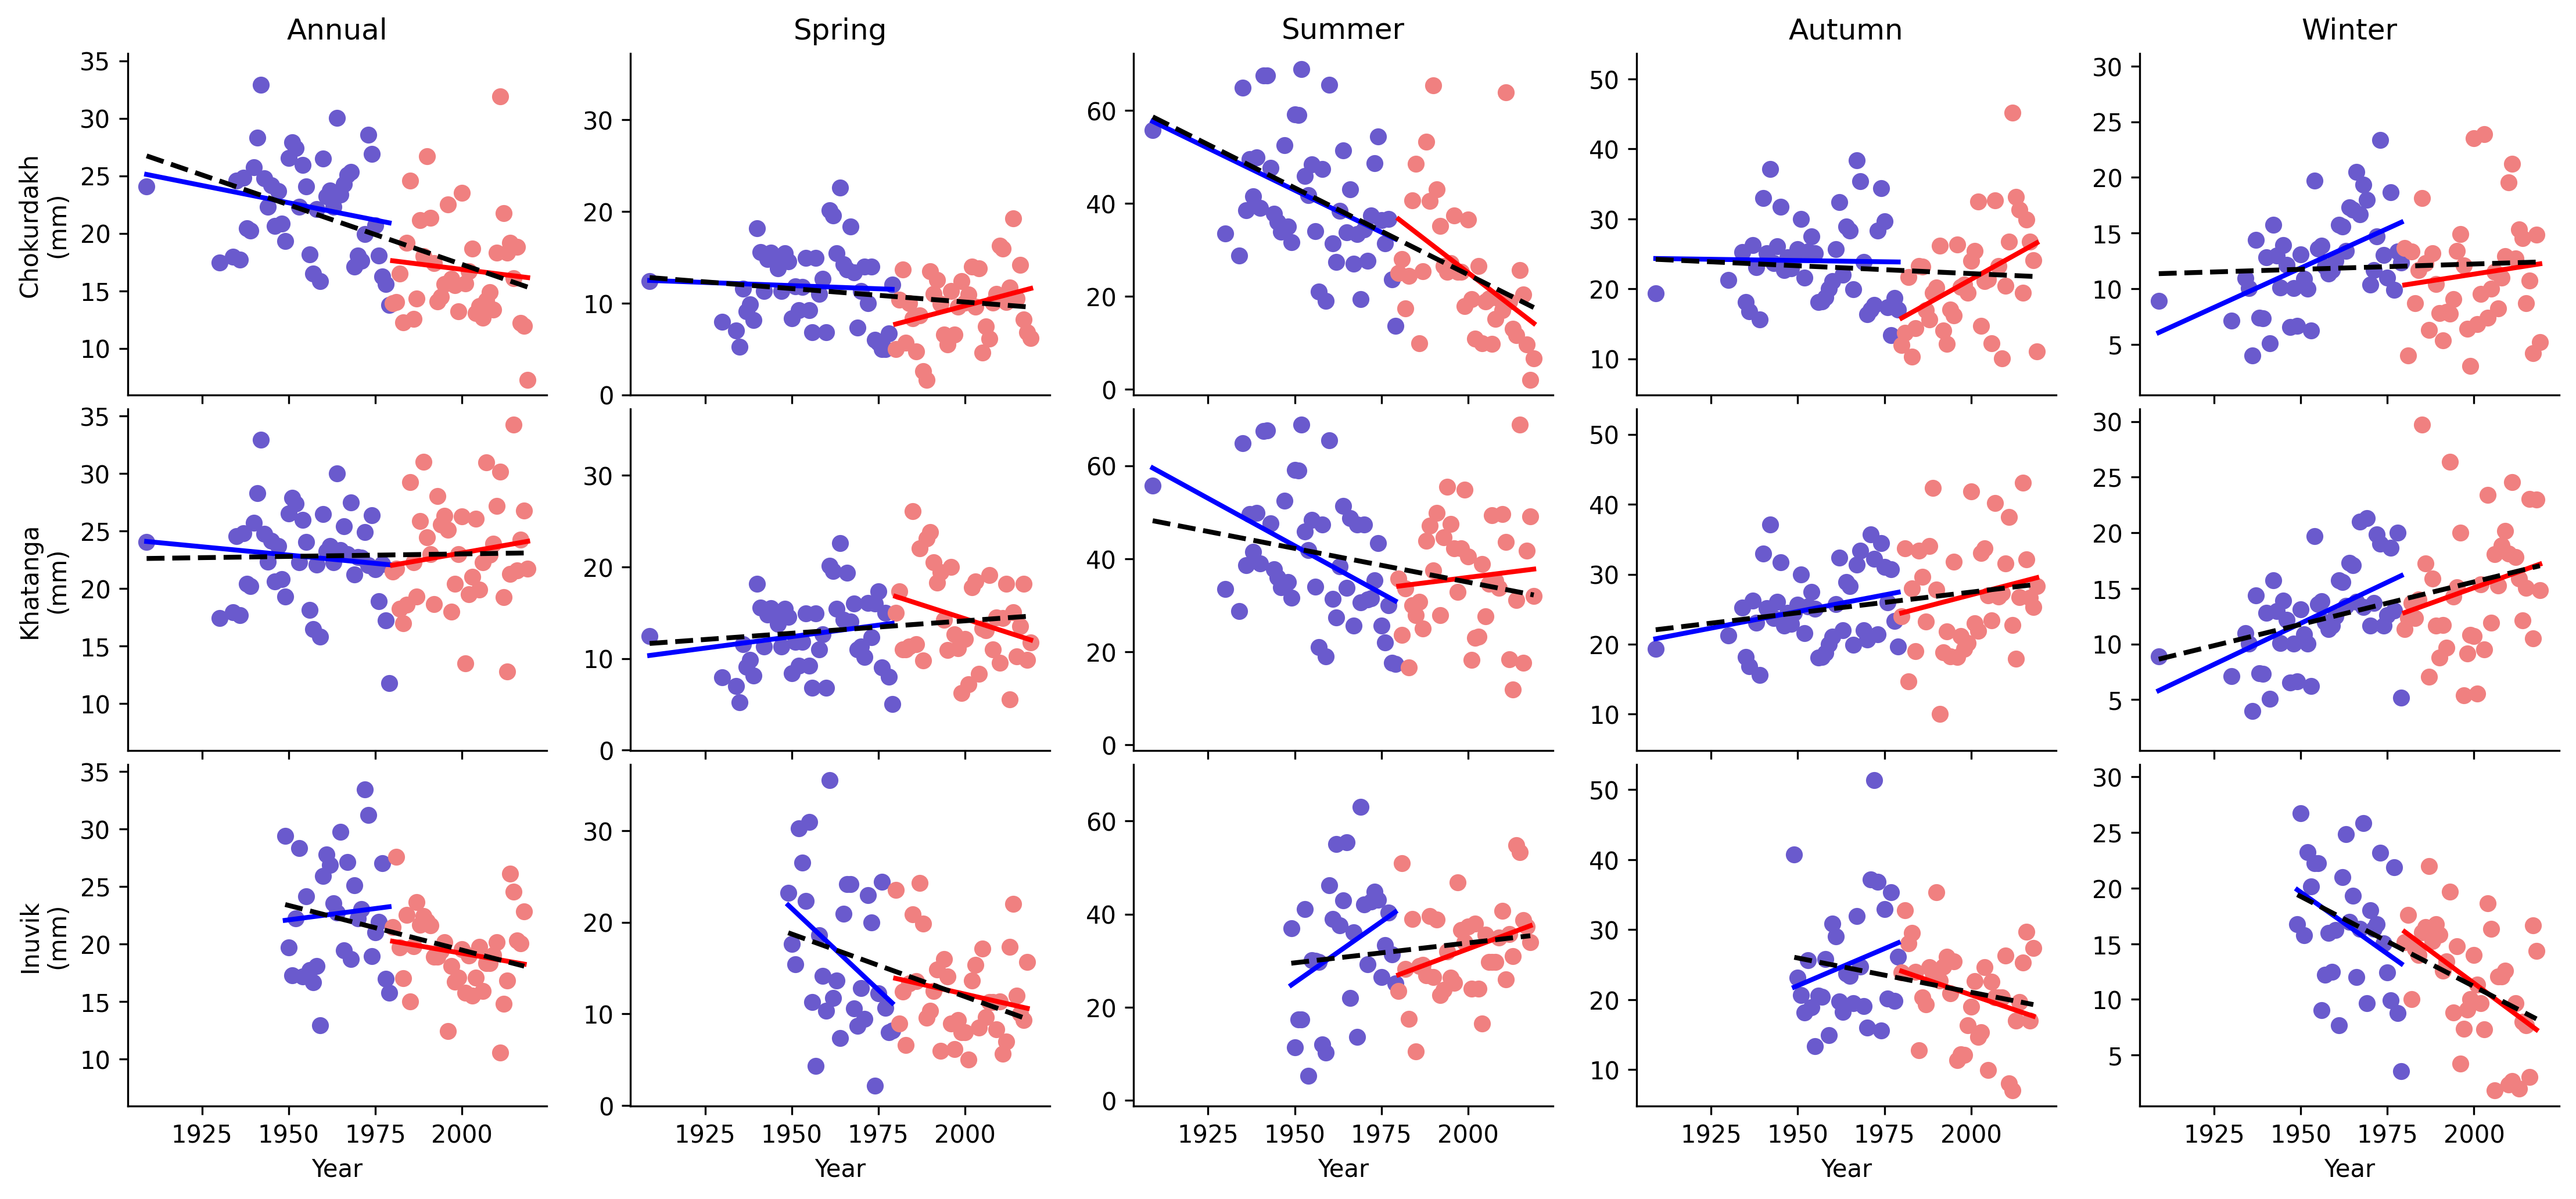

In [26]:
plot_measurements_by_measure([data['Prec_Chokurdakh'], data['Prec_Khatanga'], data['Prec_Inuvik']], ['Chokurdakh', 'Khatanga', 'Inuvik'], 'Precipitation', '(mm)', [1901, 1980], [1979, 2020], save=False)

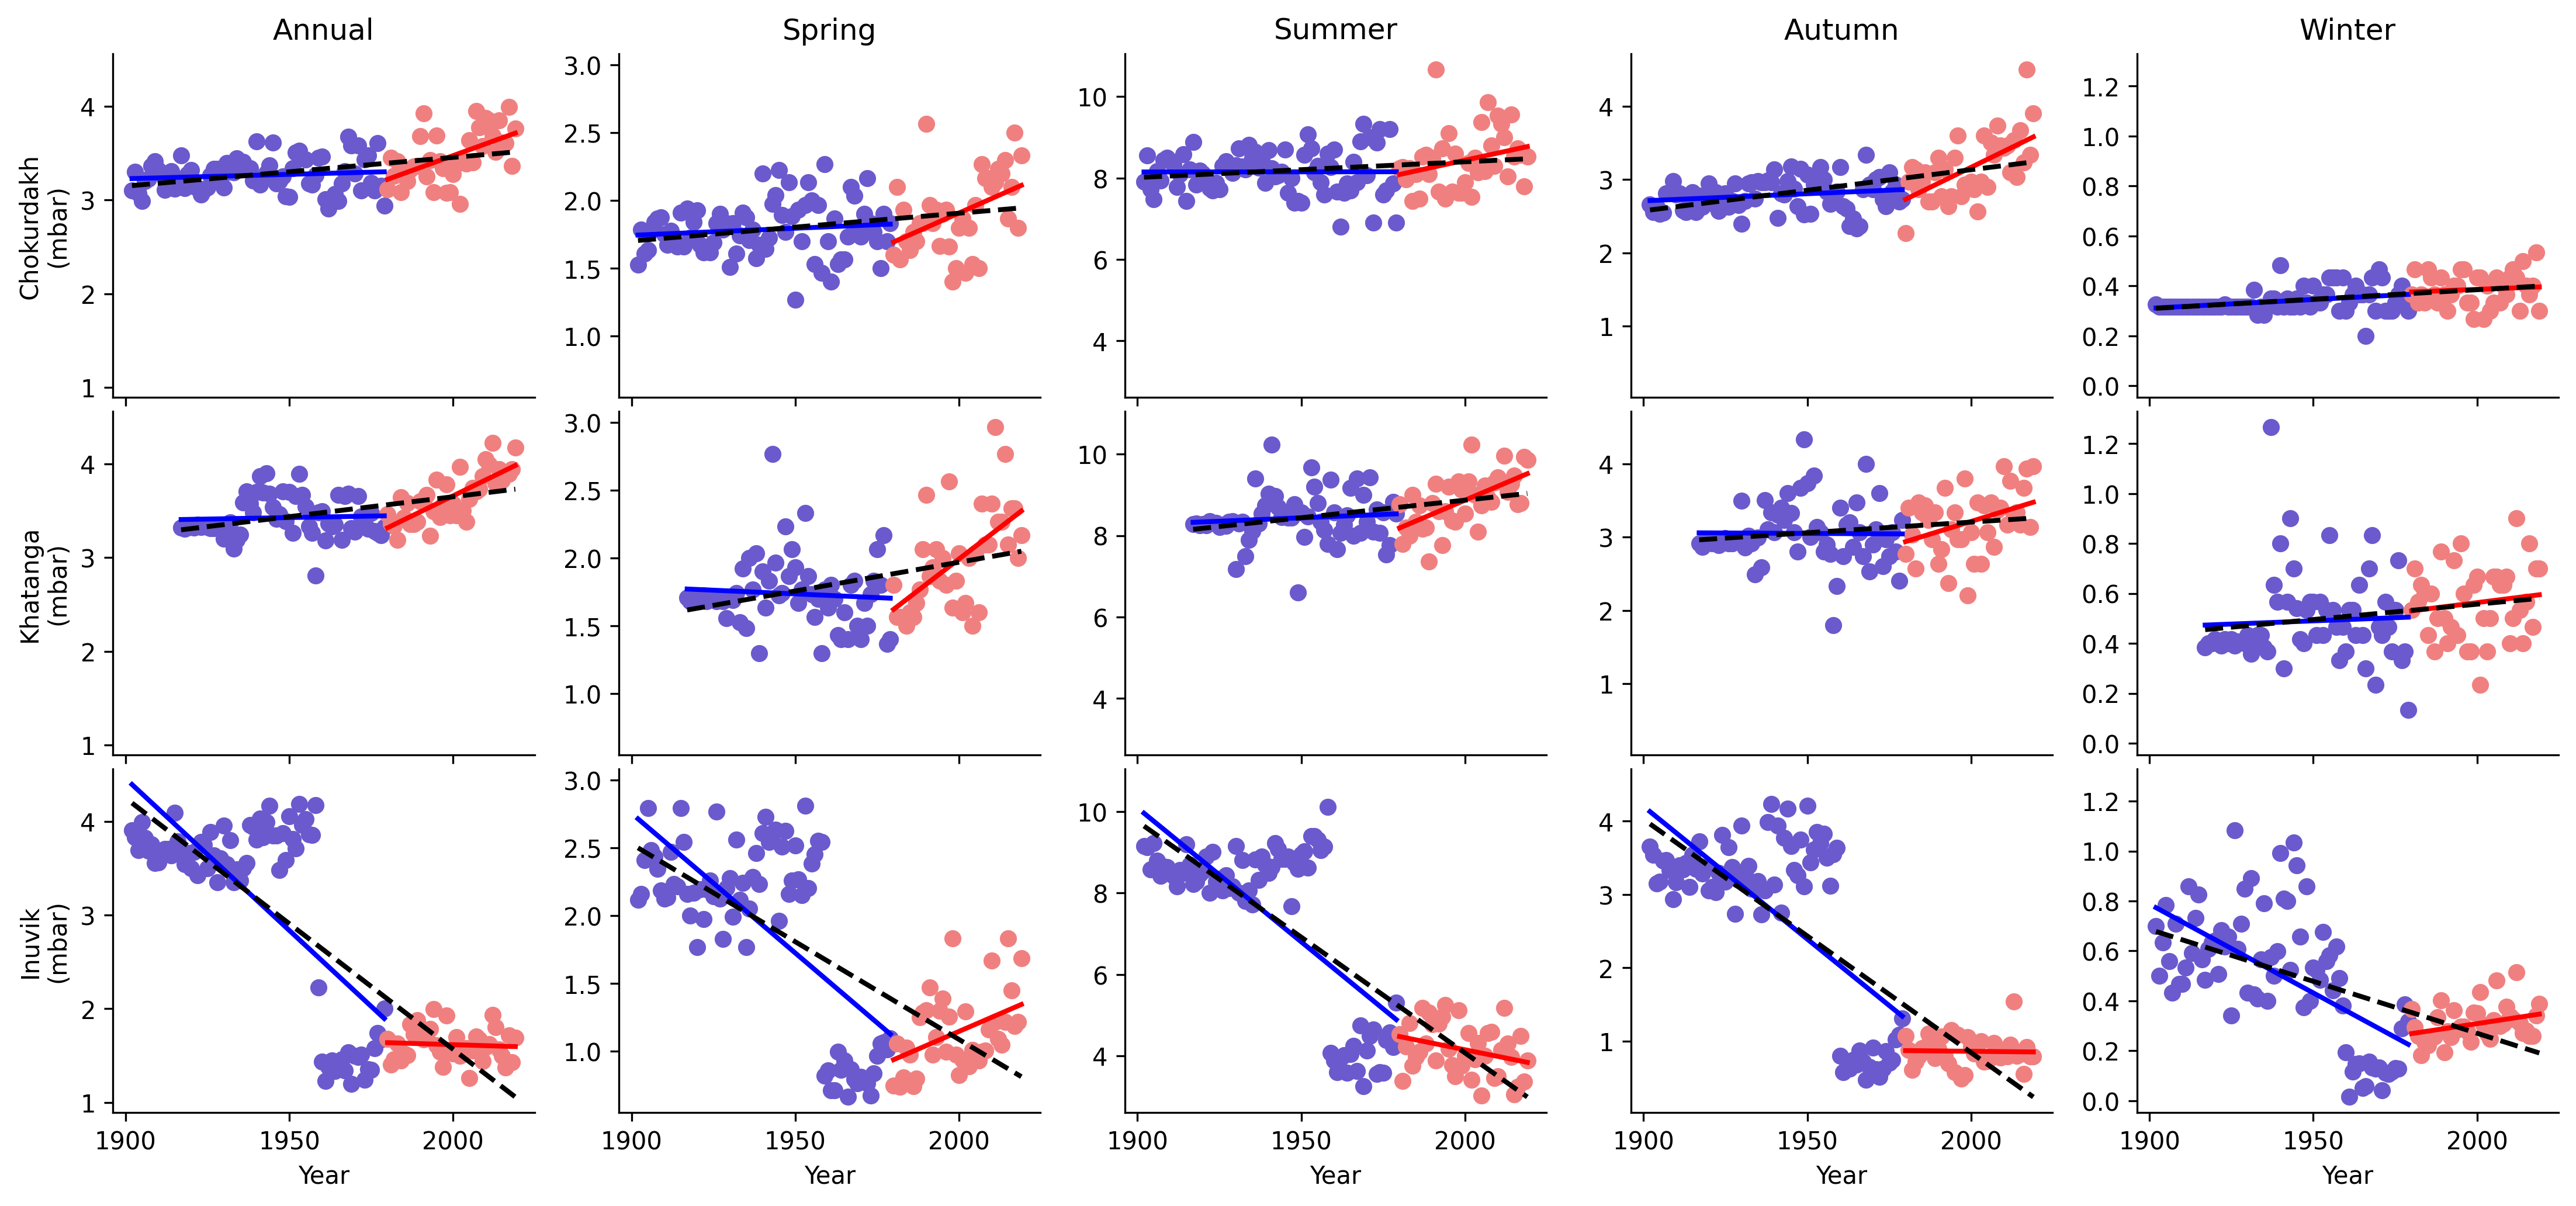

In [27]:
plot_measurements_by_measure([data['VPD_Chokurdakh'], data['VPD_Khatanga'], data['VPD_Inuvik']], ['Chokurdakh', 'Khatanga', 'Inuvik'], 'Vapour pressure deficit', '(mbar)', [1901, 1980], [1979, 2020], save=False)

In [15]:
dfs = []
for station in ['Chokurdakh', 'Khatanga', 'Inuvik']:
    dfs += [pd.read_csv(f'../output/{station}_trends.csv', encoding = "ISO-8859-1")]

df = pd.concat(dfs).reset_index(drop=True).replace('Temperature (�C)', 'Temperature (°C)')

In [10]:
years = ['1901-1979', '1980-2020', '1901-2020']
seasons = ['Annual', 'Spring', 'Summer', 'Autumn', 'Winter']
measurements = ['Temperature (°C)', 'Precipitation (mm)', 'Vapour pressure deficit (mbar)']
stations = ['Chokurdakh', 'Khatanga', 'Inuvik']

colums = [[list((mes, per)) for per in years] for mes in measurements]
colums = [item for sublist in colums for item in sublist]

indexes = [[list((stat, seas)) for seas in seasons] for stat in stations]
indexes = [item for sublist in indexes for item in sublist]

In [11]:
colums_df = pd.DataFrame(colums, columns=["Measure", "Period"])
indexes_df = pd.DataFrame(indexes, columns=["Station", "Season"])

In [12]:
s1_table = pd.DataFrame(columns=pd.MultiIndex.from_frame(colums_df), index=pd.MultiIndex.from_frame(indexes_df))

In [13]:
for mes in measurements:
     for per in years:
         for seas in seasons:
             for stat in stations:
                temp_df = df[(df['station']==stat) & (df['mes']==mes) & (df['season']==seas) & (df['years']==per)][['correlation', 'p-vaule']]
                s1_table.loc[(stat, seas), (mes, per)] = f"{sum(temp_df['correlation'].values)}\n(p={sum(temp_df['p-vaule'].values):0.2f})"

In [14]:
s1_table

Measure           Temperature (°C)                                  \
Period                   1901-1979       1980-2020       1901-2020   
Station    Season                                                    
Chokurdakh Annual   0.14\n(p=0.23)  0.69\n(p=0.00)  0.54\n(p=0.00)   
           Spring   0.07\n(p=0.54)  0.49\n(p=0.00)  0.33\n(p=0.00)   
           Summer   0.42\n(p=0.00)  0.36\n(p=0.02)  0.13\n(p=0.16)   
           Autumn   0.08\n(p=0.50)  0.69\n(p=0.00)  0.43\n(p=0.00)   
           Winter   0.41\n(p=0.00)  0.22\n(p=0.16)  0.58\n(p=0.00)   
Khatanga   Annual    0.1\n(p=0.37)  0.64\n(p=0.00)  0.36\n(p=0.00)   
           Spring   0.06\n(p=0.60)  0.58\n(p=0.00)  0.34\n(p=0.00)   
           Summer   0.11\n(p=0.33)  0.53\n(p=0.00)  0.16\n(p=0.09)   
           Autumn   0.07\n(p=0.52)  0.41\n(p=0.01)  0.18\n(p=0.05)   
           Winter   0.03\n(p=0.82)  0.12\n(p=0.47)  0.17\n(p=0.06)   
Inuvik     Annual   0.31\n(p=0.01)  0.68\n(p=0.00)  0.73\n(p=0.00)   
           Spring    0.4\n(p=0.00)  0.41\n(p=0.01)  0.64\n(p=0.00)   
           Summer   0.49\n(p=0.00)  0.02\n(p=0.89)  0.64\n(p=0.00)   
           Autumn   0.13\n(p=0.24)   0.5\n(p=0.00)  0.41\n(p=0.00)   
           Winter   0.03\n(p=0.81)  0.59\n(p=0.00)  0.48\n(p=0.00)   

Measure           Precipitation (mm)                                  \
Period                     1901-1979       1980-2020       1901-2020   
Station    Season                                                      
Chokurdakh Annual     0.21\n(p=0.14)  0.09\n(p=0.56)  0.52\n(p=0.00)   
           Spring     0.05\n(p=0.74)   0.3\n(p=0.06)  0.18\n(p=0.09)   
           Summer      0.4\n(p=0.00)  0.46\n(p=0.00)   0.6\n(p=0.00)   
           Autumn     0.02\n(p=0.90)  0.43\n(p=0.01)  0.09\n(p=0.43)   
           Winter     0.51\n(p=0.00)  0.11\n(p=0.49)  0.05\n(p=0.62)   
Khatanga   Annual     0.11\n(p=0.45)  0.13\n(p=0.41)  0.03\n(p=0.80)   
           Spring     0.19\n(p=0.20)  0.29\n(p=0.07)  0.16\n(p=0.15)   
           Summer     0.45\n(p=0.00)  0.09\n(p=0.59)  0.28\n(p=0.01)   
           Autumn     0.27\n(p=0.06)  0.19\n(p=0.23)  0.23\n(p=0.03)   
           Winter     0.52\n(p=0.00)  0.23\n(p=0.15)  0.39\n(p=0.00)   
Inuvik     Annual     0.07\n(p=0.71)  0.17\n(p=0.29)  0.35\n(p=0.00)   
           Spring     0.39\n(p=0.03)   0.2\n(p=0.23)   0.4\n(p=0.00)   
           Summer     0.33\n(p=0.07)  0.33\n(p=0.04)  0.15\n(p=0.22)   
           Autumn     0.22\n(p=0.23)  0.29\n(p=0.07)  0.25\n(p=0.03)   
           Winter     0.35\n(p=0.06)   0.5\n(p=0.00)  0.55\n(p=0.00)   

Measure           Vapour pressure deficit (mbar)                  \
Period                                 1901-1979       1980-2020   
Station    Season                                                  
Chokurdakh Annual                 0.12\n(p=0.29)  0.54\n(p=0.00)   
           Spring                 0.12\n(p=0.29)  0.43\n(p=0.01)   
           Summer                  0.0\n(p=0.98)  0.29\n(p=0.07)   
           Autumn                 0.21\n(p=0.07)  0.61\n(p=0.00)   
           Winter                 0.34\n(p=0.00)  0.09\n(p=0.57)   
Khatanga   Annual                 0.06\n(p=0.66)  0.77\n(p=0.00)   
           Spring                 0.08\n(p=0.53)   0.6\n(p=0.00)   
           Summer                 0.11\n(p=0.41)  0.63\n(p=0.00)   
           Autumn                 0.01\n(p=0.93)  0.38\n(p=0.02)   
           Winter                 0.05\n(p=0.68)  0.13\n(p=0.42)   
Inuvik     Annual                 0.71\n(p=0.00)  0.07\n(p=0.65)   
           Spring                 0.68\n(p=0.00)  0.43\n(p=0.01)   
           Summer                 0.71\n(p=0.00)  0.31\n(p=0.05)   
           Autumn                 0.68\n(p=0.00)  0.03\n(p=0.86)   
           Winter                 0.62\n(p=0.00)  0.33\n(p=0.04)   

Measure                            
Period                  1901-2020  
Station    Season                  
Chokurdakh Annual  0.45\n(p=0.00)  
           Spring   0.3\n(p=0.00)  
           Summer  0.22\n(p=0.02)  
 

In [16]:
s1_table.to_excel('output/Table S1.xlsx')